<h1>Hemispherical FP cavity</h1>

Radius of curvatures:
ITM = 0 (infinity)
ETM = 10m (Rcx,Rcy)

Length of cavity: 
scav = 10m

In [16]:

from pykat import finesse        
from pykat.commands import *     
import numpy as np               
import matplotlib.pyplot as plt  
import scipy                     
from IPython import display

%matplotlib inline               

pykat.init_pykat_plotting(dpi=90)



In [17]:
basecode = """


#input laser
l laser 10 0 n0
s s0 0.1 n0 n1

retrace off
trace 2

#cavity:
m1 ITM 0.014 0 0 n1 n2
s scav 10 n2 n3
m1 ETM 0 0 0 n3 n4

#radius of curvature of ITM and ETM
attr ITM Rc 0
attr ETM Rcy 10
attr ETM Rcx 10


#cavity params
cav scav1 ITM n2 ETM n3
cp scav1 x A
cp scav1 x B
cp scav1 x C
cp scav1 x D


xaxis ETM Rcy lin 10 18 2000

#func to change Rcx 
func Rc1 = $x1
noplot Rc1
put ETM Rcx $Rc1

yaxis abs
"""

--------------------------------------------------------------
Running kat - Started at 2021-06-07 09:57:39.341852
Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 0.12905 seconds


100% | ETA:  0:00:00 | Calculating                                             

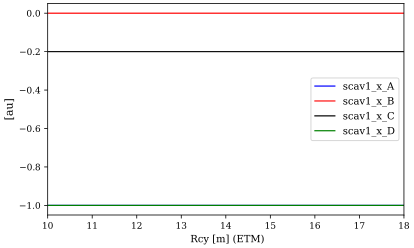

[10.    10.004 10.008 ... 17.992 17.996 18.   ]


In [18]:
basekat = finesse.kat() 
basekat.verbose = 1
basekat.parse(basecode)
out=basekat.run()
out.plot()
print(out['Rc1'])